In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
cal_df = pd.read_csv('calories.csv')
ex_df = pd.read_csv('exercise.csv')

In [3]:
cal_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
ex_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df = pd.merge(ex_df,cal_df, on = 'User_ID')

In [6]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
df.isnull().sum()*100/len(df)

User_ID       0.0
Gender        0.0
Age           0.0
Height        0.0
Weight        0.0
Duration      0.0
Heart_Rate    0.0
Body_Temp     0.0
Calories      0.0
dtype: float64

In [9]:
df = df.drop(columns= {'User_ID'})

In [10]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'female' else 0)

In [11]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


## visualization

In [12]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

C:\Users\sandh\AppData\Local\Temp\ipykernel_34044\1475586201.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], bins=20, kde=True, palette= 'rainbow')
C:\Users\sandh\AppData\Local\Temp\ipykernel_34044\1475586201.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], bins=20, kde=True, palette= 'rainbow')
C:\Users\sandh\AppData\Local\Temp\ipykernel_34044\1475586201.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], bins=20, kde=True, palette= 'rainbow')
C:\Users\sandh\AppData\Local\Temp\ipykernel_34044\1475586201.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], bins=20, kde=True, palette= 'rainbow')
C:\Users\sandh\AppData\Local\Temp\ipykernel_34044\1475586201.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], bins

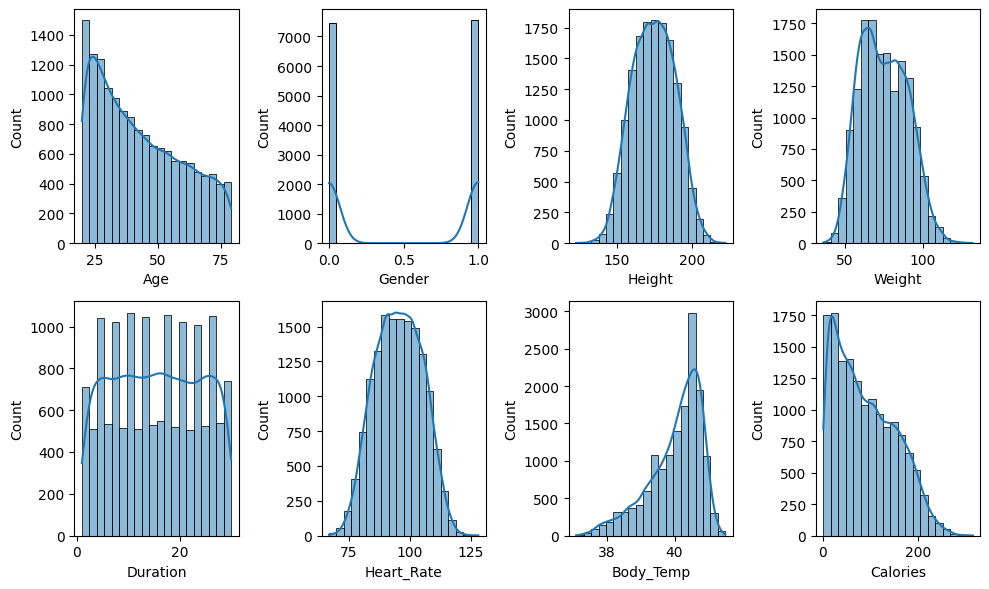

In [13]:
cols = ['Age','Gender', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories']

plt.figure(figsize = (10,6))
for i,col in enumerate(cols):
    plt.subplot(2,4,i+1)
    sns.histplot(df[col], bins=20, kde=True, palette= 'rainbow')
    plt.tight_layout()

<Axes: >

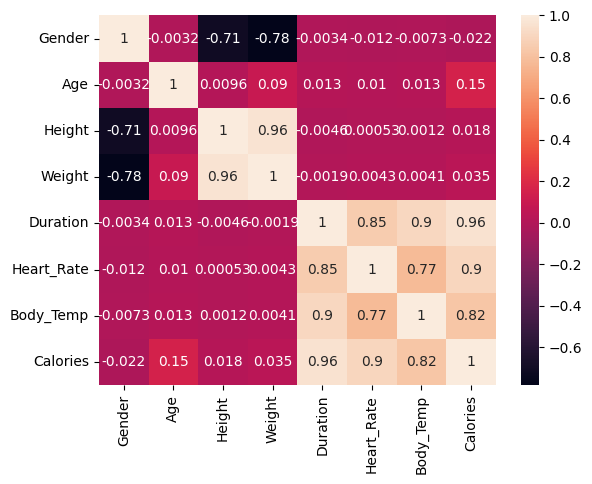

In [14]:
sns.heatmap(df.corr(numeric_only= True),annot = True)

In [15]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [16]:
x = df.drop(columns= {'Calories'})
y = df['Calories']

In [17]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [18]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
pred_xg = xg.predict(X_test)
print('ABSOLUTE MEAN ERROR:', mean_absolute_error(y_test,pred_xg))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_xg))) # Lower = better
print('R² Score:', r2_score(y_test, pred_xg))   

ABSOLUTE MEAN ERROR: 1.5625125778842754
RMSE: 2.229096946006088
R² Score: 0.9987427591522791


In [19]:
input_data = (0,53,182.0,85.0,2.0,82.0,38.1)
input_nparray = np.asarray(input_data)
reshaped_array = input_nparray.reshape(1,-1)
pred = xg.predict(reshaped_array)
print('Calories burnt:', pred)


Calories burnt: [7.792755]


In [21]:
import joblib
joblib.dump(xg, 'model/calorie_model.pkl')

['model/calorie_model.pkl']